<a href="https://colab.research.google.com/github/anujthapamagar/BDOA/blob/main/class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# check if opendatasets library is installed, if so - load it, if not - install it! 
try:
  import opendatasets as pd
except ImportError as e:
  !pip install opendatasets
  import opendatasets as od

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# download the data
od.download("https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities")

#access them from the download folder
fn = "daily-temperature-of-major-cities/city_temperature.csv"
df = pd.read_csv(fn, low_memory = False)

# Check the memory usage
df.info(memory_usage="deep")

Skipping, found downloaded files in "./daily-temperature-of-major-cities" (use force=True to force download)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 767.7 MB


In [26]:
# lets checkout which cities we have in Europe
df[df.Region=="Europe"].City.unique()

array(['Tirana', 'Vienna', 'Minsk', 'Brussels', 'Sofia', 'Zagreb',
       'Nicosia', 'Prague', 'Copenhagen', 'Helsinki', 'Paris', 'Bordeaux',
       'Bonn', 'Frankfurt', 'Hamburg', 'Munich', 'Tbilisi', 'Athens',
       'Budapest', 'Reykjavik', 'Dublin', 'Milan', 'Rome', 'Riga',
       'Skopje', 'Amsterdam', 'Oslo', 'Warsaw', 'Lisbon', 'Bucharest',
       'Moscow', 'Yerevan', 'Pristina', 'Bratislava', 'Barcelona',
       'Bilbao', 'Madrid', 'Stockholm', 'Bern', 'Geneva', 'Zurich',
       'Kiev', 'Belfast', 'London', 'Belgrade'], dtype=object)

In [27]:
# Check the temperature range
df.AvgTemperature.min(), df.AvgTemperature.max()

(-99.0, 110.0)

In [29]:
# Cleaning the dataset for what we want
# Lets use some city
df1 = df[df.City=="Amsterdam"]

# use only timestamp and average temperature
df1 = df1[['Year', 'Month', 'Day', 'AvgTemperature']]

# filter for meaningful temperatures
df1 = df1[df['AvgTemperature']> -70]

# Create a datetime object and set as index
df1['Date'] = pd.to_datetime(df1[['Year', 'Month', 'Day']])
df1 = df1.set_index(df1['Date'])

# Select only average temperature
df1 = df1[['AvgTemperature']]

# Change to degree celcius °C
df1['AvgTemperature(°C)'] = (df1['AvgTemperature']-32)*5/9

<ipython-input-29-5e6c9f60fc02>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df['AvgTemperature']> -70]


In [30]:
df1

,AvgTemperature,AvgTemperature(°C)
Date,,
1995-01-01,37.6,3.111111
1995-01-02,38.6,3.666667
1995-01-03,33.3,0.722222
1995-01-04,29.2,-1.555556
1995-01-05,25.8,-3.444444
...,...,...
2020-05-09,63.4,17.444444
2020-05-10,55.6,13.111111
2020-05-11,47.1,8.388889


# visualise the data

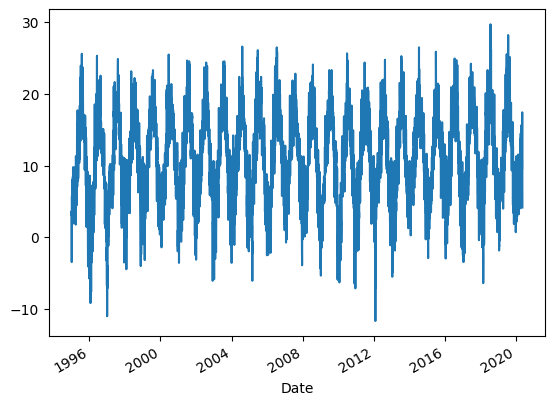

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9236 entries, 1995-01-01 to 2020-05-13
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AvgTemperature      9236 non-null   float64
 1   AvgTemperature(°C)  9236 non-null   float64
dtypes: float64(2)
memory usage: 216.5 KB
None


,AvgTemperature,AvgTemperature(°C)
count,9236.000000,9236.000000
mean,51.304710,10.724839
std,10.981771,6.100984
min,11.000000,-11.666667
25%,43.400000,6.333333
50%,51.300000,10.722222
75%,60.100000,15.611111
max,85.500000,29.722222


In [31]:
df1['AvgTemperature(°C)'].plot()
plt.show()

print(df1.info(memory_usage="deep"))
df1.describe()

In [32]:
df[df.Region=="Asia"].City.unique()

array(['Dhaka', 'Beijing', 'Chengdu', 'Guangzhou', 'Shanghai', 'Shenyang',
       'Hong Kong', 'Bombay (Mumbai)', 'Calcutta', 'Chennai (Madras)',
       'Delhi', 'Jakarta', 'Osaka', 'Sapporo', 'Tokyo', 'Almaty',
       'Bishkek', 'Vientiane', 'Kuala Lumpur', 'Ulan-bator', 'Rangoon',
       'Katmandu', 'Pyongyang', 'Islamabad', 'Karachi', 'Manila',
       'Singapore', 'Seoul', 'Colombo', 'Taipei', 'Dusanbe', 'Bangkok',
       'Ashabad', 'Tashkent', 'Hanoi'], dtype=object)

In [35]:
# Cleaning the dataset for what we want
# Lets use some city
df2 = df[df.City=="Katmandu"]

# use only timestamp and average temperature
df2 = df2[['Year', 'Month', 'Day', 'AvgTemperature']]

# filter for meaningful temperatures
df2 = df2[df2['AvgTemperature']> -70]

# Create a datetime object and set as index
df2['Date'] = pd.to_datetime(df2[['Year', 'Month', 'Day']])
df2 = df2.set_index(df2['Date'])

# Select only average temperature
df2 = df2[['AvgTemperature']]

# Change to degree celcius °C
df2['AvgTemperature(°C)'] = (df2['AvgTemperature']-32)*5/9

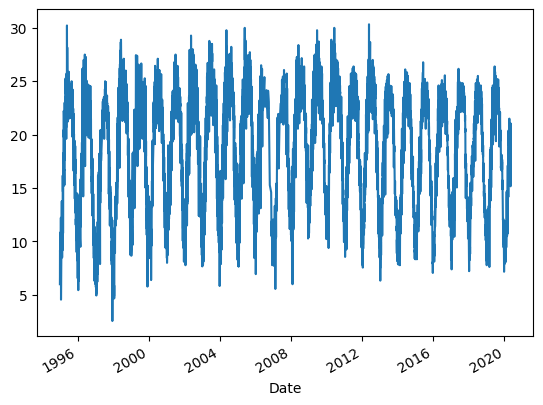

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8336 entries, 1995-01-02 to 2020-05-13
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AvgTemperature      8336 non-null   float64
 1   AvgTemperature(°C)  8336 non-null   float64
dtypes: float64(2)
memory usage: 195.4 KB
None


,AvgTemperature,AvgTemperature(°C)
count,8336.000000,8336.000000
mean,66.040979,18.911655
std,9.747409,5.415227
min,36.600000,2.555556
25%,57.800000,14.333333
50%,68.600000,20.333333
75%,74.300000,23.500000
max,86.600000,30.333333


In [36]:
df2['AvgTemperature(°C)'].plot()
plt.show()

print(df2.info(memory_usage="deep"))
df2.describe()